In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import sklearn.metrics
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
from glob import glob
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
import glob
imdir = "C:/Users/visha/Desktop/DATA SCIENCE PROJECTS/CORONA_LUNG_DATASET/data/covid/"
ext = ['jpeg', 'jpg', 'png']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

In [4]:
len(images)

151

In [5]:
norm_images = [cv2.imread(file) for file in glob.glob('C:/Users/visha/Desktop/DATA SCIENCE PROJECTS/CORONA_LUNG_DATASET/data/normal/*.jpeg')]

In [6]:
norm=pd.DataFrame(norm_images,columns=["Images"])

C:\Users\visha\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [7]:
norm

,Images
0,"[[[72, 72, 72], [68, 68, 68], [67, 67, 67], [7..."
1,"[[[0, 0, 0], [46, 46, 46], [43, 43, 43], [42, ..."
2,"[[[80, 80, 80], [79, 79, 79], [77, 77, 77], [7..."
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,"[[[78, 78, 78], [79, 79, 79], [77, 77, 77], [7..."
...,...
146,"[[[5, 5, 5], [2, 2, 2], [1, 1, 1], [4, 4, 4], ..."
147,"[[[6, 6, 6], [6, 6, 6], [6, 6, 6], [6, 6, 6], ..."
148,"[[[77, 77, 77], [81, 81, 81], [85, 85, 85], [8..."
149,"[[[43, 43, 43], [45, 45, 45], [46, 46, 46], [4..."


In [8]:
cov = pd.DataFrame(images,columns=["Images"])
cov

C:\Users\visha\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,Images
0,"[[[182, 182, 182], [169, 169, 169], [152, 152,..."
1,"[[[255, 255, 255], [255, 255, 255], [126, 126,..."
2,"[[[253, 253, 253], [109, 109, 109], [107, 107,..."
3,"[[[39, 39, 39], [47, 47, 47], [49, 49, 49], [4..."
4,"[[[178, 178, 178], [178, 178, 178], [178, 178,..."
...,...
146,"[[[67, 67, 67], [72, 72, 72], [77, 77, 77], [7..."
147,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ..."
148,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
149,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


#### Checking and plot any one image:

In [9]:
img1=images[0][0][0]
img1

array([182, 182, 182], dtype=uint8)

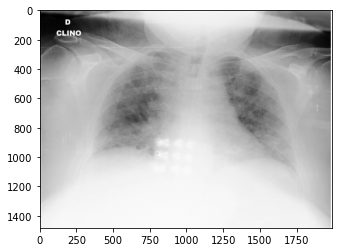

In [10]:
import matplotlib.pyplot as plt
im = cv2.imread("C:/Users/visha/Desktop/DATA SCIENCE PROJECTS/CORONA_LUNG_DATASET/data/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg", 0) / 255
plt.imshow(im, cmap='gray', vmin=0, vmax=1) 
plt.show()

### Keras split train test set using Imagedatagenerator:

In [11]:
from keras.preprocessing import image

train_gen = image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2)

val_gen = image.ImageDataGenerator(rescale = 1/255)

In [12]:
DIR = "C:/Users/visha/Desktop/DATA SCIENCE PROJECTS/CORONA_LUNG_DATASET/data/"
SUBDIR_POS = 'covid/'
SUBDIR_NEG = 'normal/'
print(f'Positive samples: {len(os.listdir(DIR + SUBDIR_POS))}.')
print(f'Negative samples: {len(os.listdir(DIR + SUBDIR_NEG))}.')

Positive samples: 151.
Negative samples: 151.


In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 40
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)
img_height, img_width = 248, 248
es = EarlyStopping(monitor='val_acc', mode='max',
                   verbose=1, 
                   patience=10, restore_best_weights=True)

In [14]:
#keras-split-train-test-set-when-using-imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation')

Found 242 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [15]:
train_generator

In [16]:
validation_generator

### Function Definition to build CNN Model:

In [17]:
def create_model():
    model = Sequential([
        Conv2D(16, 1, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=OPTIMIZER,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

### Model Building

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D


model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      32        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [19]:
hist=model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/40
4/4 [==============================] - 38s 8s/step - loss: 0.7021 - accuracy: 0.4669 - precision: 0.4487 - recall: 0.2893 - val_loss: 0.6897 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
4/4 [==============================] - 35s 9s/step - loss: 0.6788 - accuracy: 0.5909 - precision: 0.5948 - recall: 0.5702 - val_loss: 0.6459 - val_accuracy: 0.5167 - val_precision: 1.0000 - val_recall: 0.0333
Epoch 3/40
4/4 [==============================] - 43s 11s/step - loss: 0.6287 - accuracy: 0.6364 - precision: 0.6279 - recall: 0.6694 - val_loss: 0.4915 - val_accuracy: 0.9333 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 4/40
4/4 [==============================] - 31s 7s/step - loss: 0.5163 - accuracy: 0.7438 - precision: 0.7185 - recall: 0.8017 - val_loss: 0.3896 - val_accuracy: 0.8500 - val_precision: 1.0000 - val_recall: 0.7000
Epoch 5/40
4/4 [==============================] - 29s 7s/step - loss: 0.4422 - accuracy: 0.7769 - precision: 0.

4/4 [==============================] - 28s 8s/step - loss: 0.0791 - accuracy: 0.9793 - precision: 0.9754 - recall: 0.9835 - val_loss: 0.0499 - val_accuracy: 0.9833 - val_precision: 1.0000 - val_recall: 0.9667
Epoch 39/40
4/4 [==============================] - 26s 7s/step - loss: 0.1060 - accuracy: 0.9752 - precision: 0.9675 - recall: 0.9835 - val_loss: 0.0080 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 40/40
4/4 [==============================] - 30s 8s/step - loss: 0.0645 - accuracy: 0.9917 - precision: 0.9837 - recall: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


#### Plot the loss and accuracy graphs:

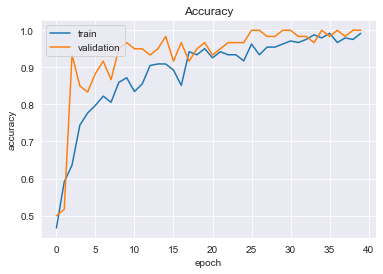

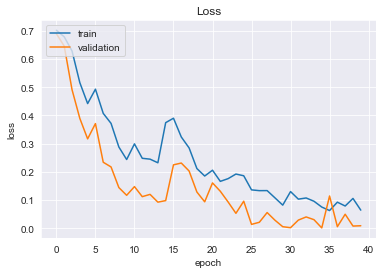

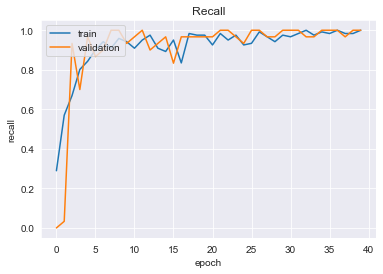

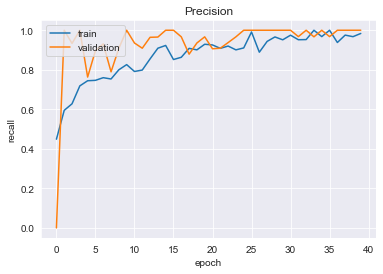

In [24]:
sns.set_style('darkgrid')

plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Recall')
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Precision')
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Testing the model with test data:

In [25]:
y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
y_true = validation_generator.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

C:\Users\visha\AppData\Local\Temp/ipykernel_10040/4182330657.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
C:\Users\visha\AppData\Local\Temp/ipykernel_10040/4182330657.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):


loss: 0.03811950609087944
accuracy: 0.9833333492279053
precision: 1.0
recall: 0.9666666388511658
F1 score: 0.43333333333333335


In [26]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_true, y_pred), 
             columns=['pred no covid', 'pred covid'], 
             index=['true no covid', 'true covid'])

,pred no covid,pred covid
true no covid,13,17
true covid,17,13


Save the weight file:

In [27]:
model_json = model.to_json()
with open("corona_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")